In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv('healthcare-dataset-stroke-data.csv')
d

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
d.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
d.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [6]:
d.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [7]:
d.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [8]:
d.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [9]:
d_cat=list(d.select_dtypes(object).columns)
d_cat

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [10]:
d_int=list(d.select_dtypes(int).columns)
d_int

['id', 'hypertension', 'heart_disease', 'stroke']

In [11]:
d_float=list(d.select_dtypes(float).columns)
d_float

['age', 'avg_glucose_level', 'bmi']

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

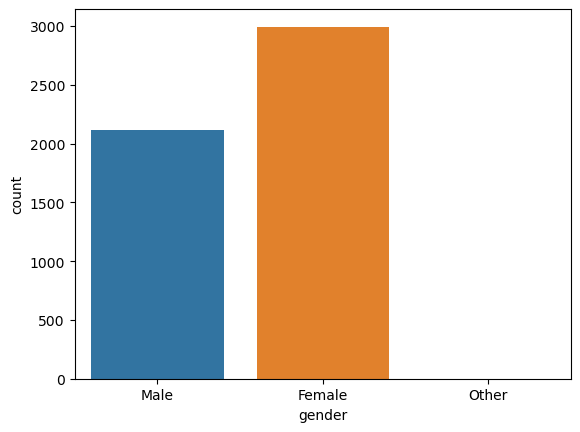

In [12]:
sns.countplot(x='gender', data=d)
d.gender.value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

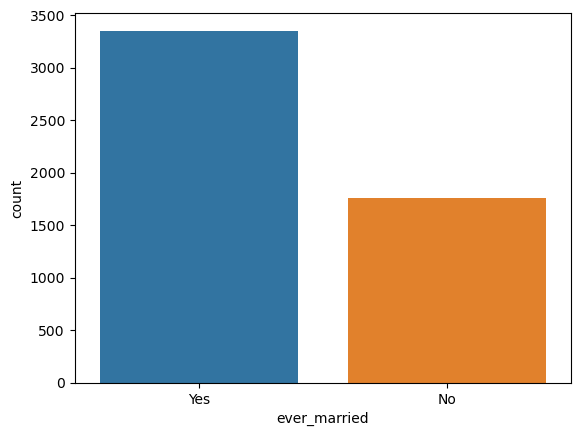

In [13]:
sns.countplot(x='ever_married', data=d)
d.ever_married.value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

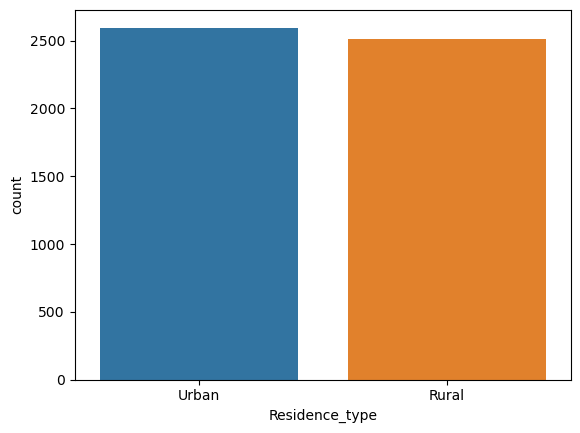

In [14]:
sns.countplot(x='Residence_type', data=d)
d.Residence_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

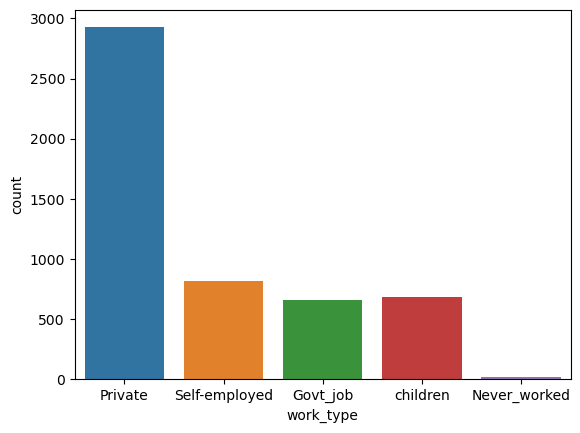

In [15]:
sns.countplot(x='work_type', data=d)
d.work_type.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

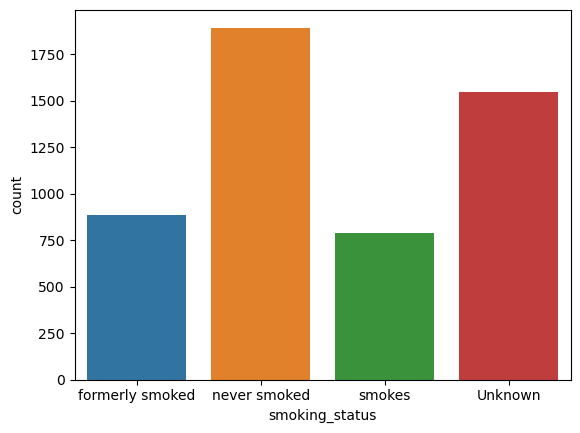

In [16]:
sns.countplot(x='smoking_status', data=d)
d.smoking_status.value_counts()

In [17]:
d1=d[['hypertension', 'heart_disease', 'stroke']]

In [18]:
d2=d[['age', 'avg_glucose_level', 'bmi']]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

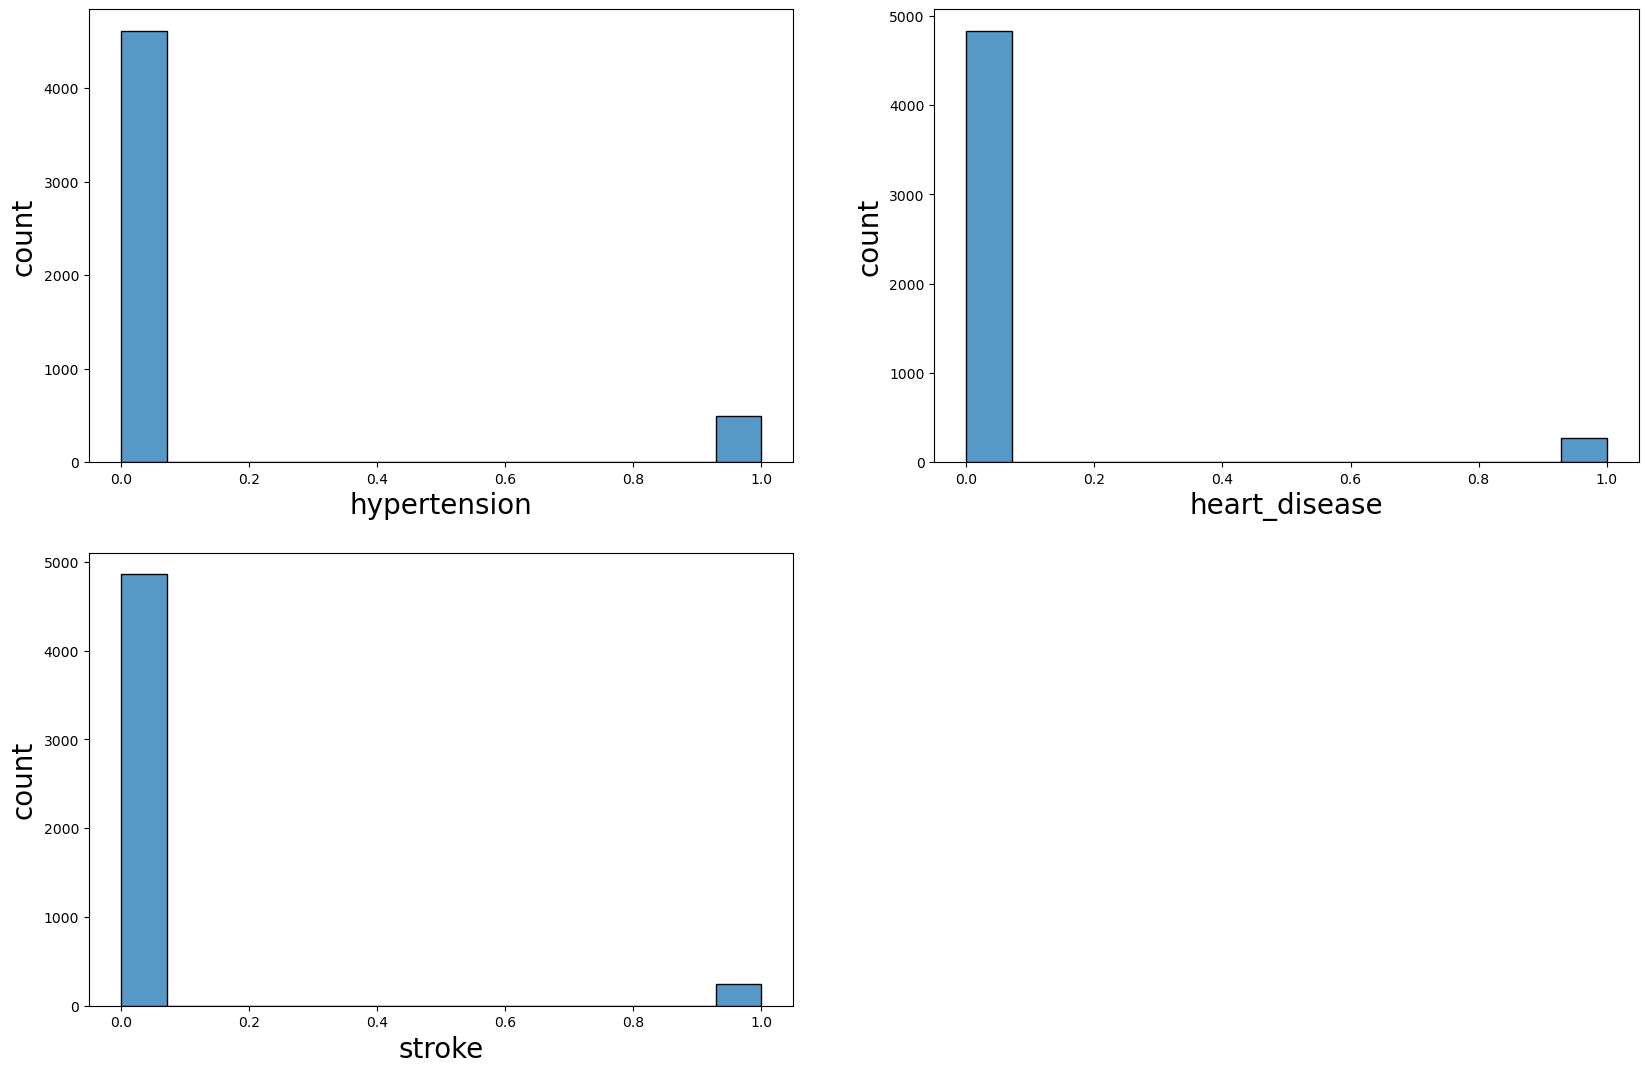

In [19]:
plt.figure(figsize=(20,20),facecolor='white')
plot=1
for col in d1:
    if plot<=4:
        ax=plt.subplot(3,2,plot)
        sns.histplot(d1[col])
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot+=1
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

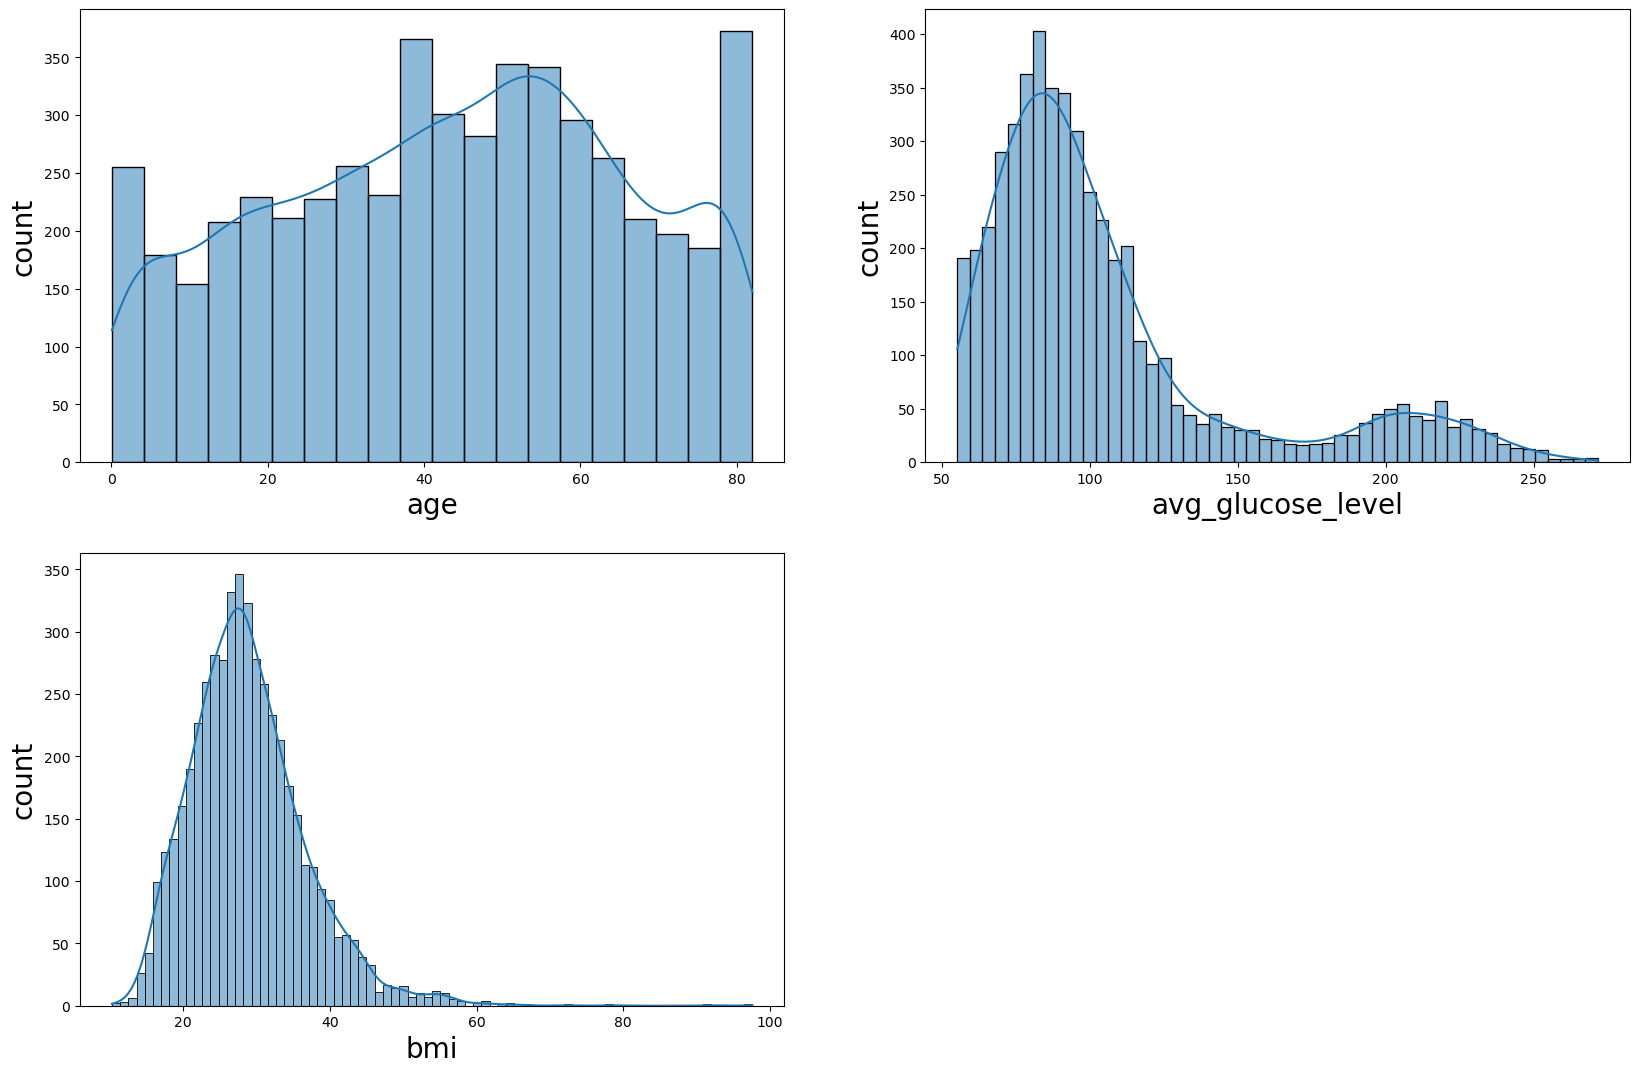

In [20]:
plt.figure(figsize=(20,20),facecolor='white')
plot=1
for col in d2:
    if plot<=4:
        ax=plt.subplot(3,2,plot)
        sns.histplot(d2[col],kde=True)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot+=1
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

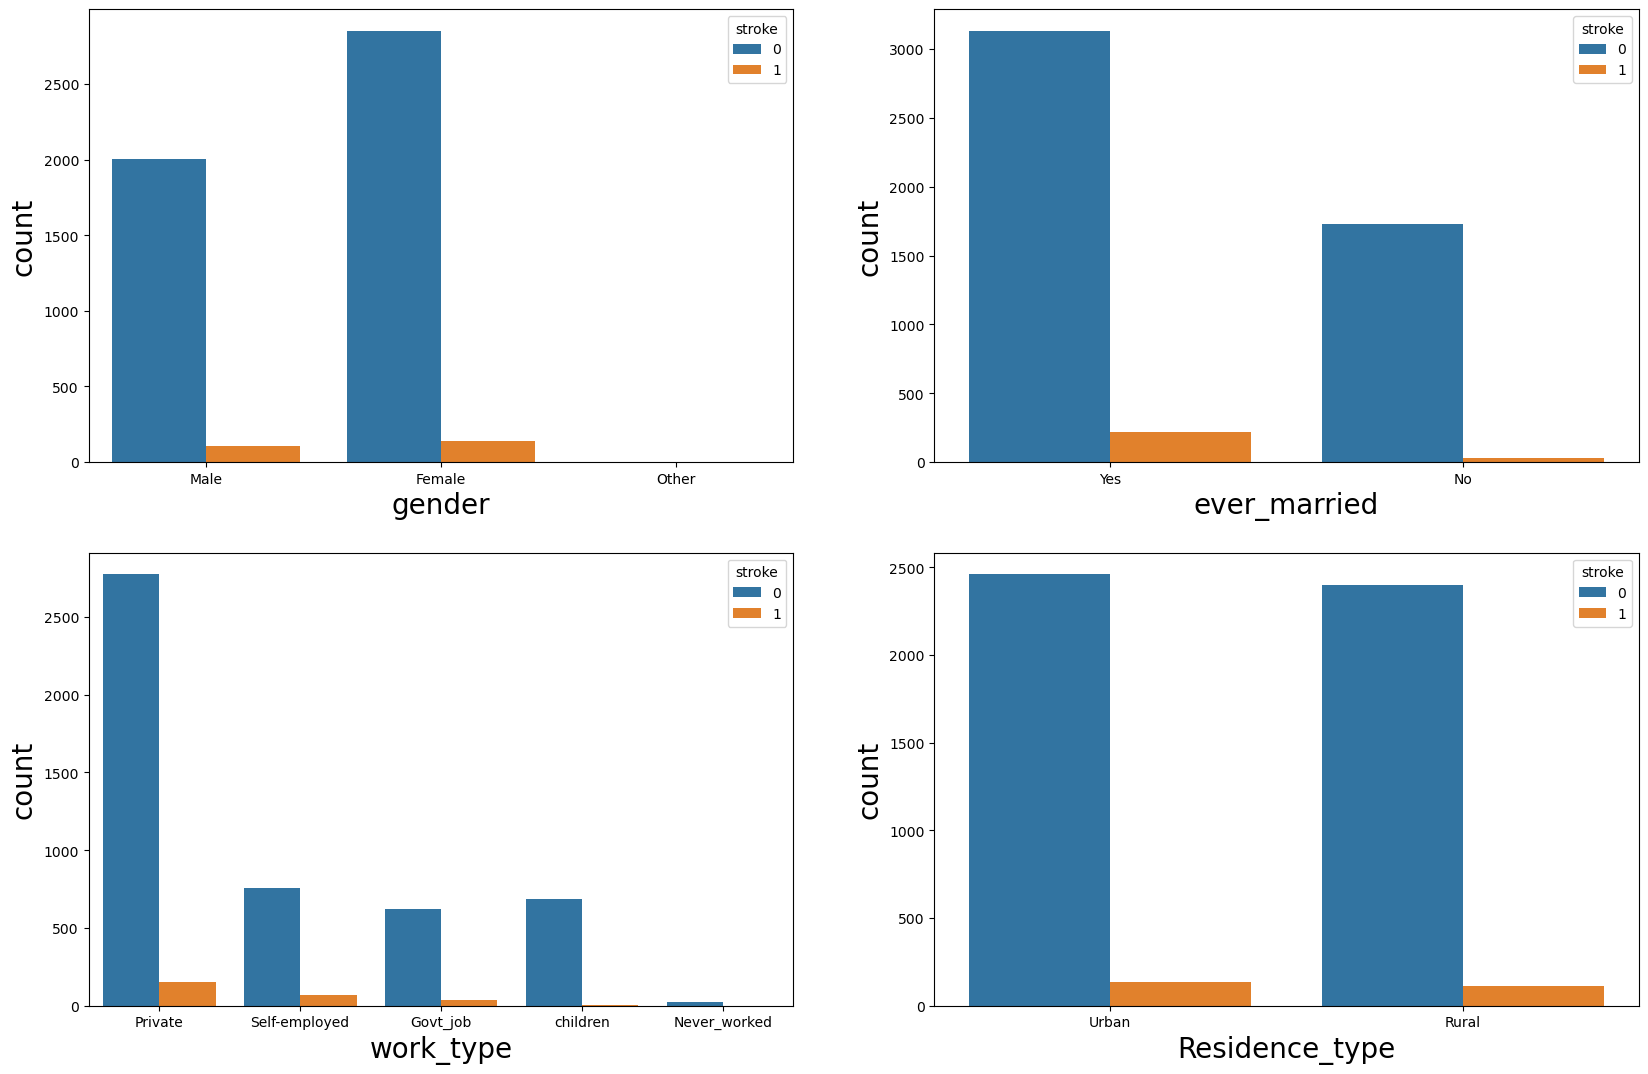

In [21]:
plt.figure(figsize=(20,20),facecolor='white')
plot=1
for col in d_cat:
    if plot<=4:
        ax=plt.subplot(3,2,plot)
        sns.countplot(x=d[col],hue=d.stroke)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot+=1
plt.tight_layout

In [22]:
d.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [23]:
d.bmi.isnull().sum()/len(d)*100

3.9334637964774952

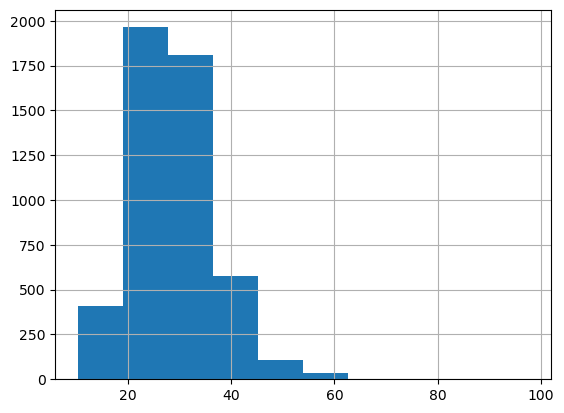

<Axes: xlabel='bmi'>

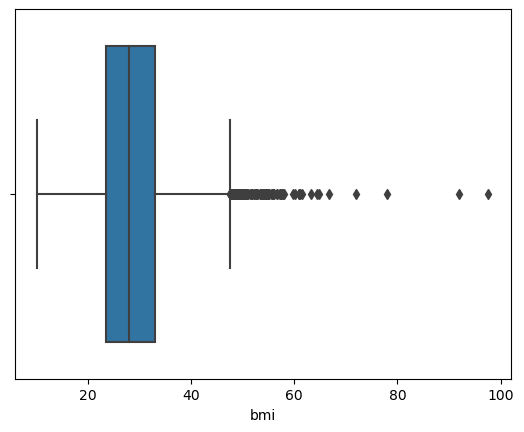

In [24]:
d.bmi.hist()
plt.show()
sns.boxplot(x='bmi',data=d)

In [25]:
d.loc[d['bmi'].isnull()==True,'bmi']=np.median(d['bmi'].dropna(axis=0))

In [26]:
d.bmi.isnull().sum()

0

In [27]:
d.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [28]:
d.gender=d.gender.replace('Other','Female')

In [29]:
d_cat

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [30]:
d.gender.unique()

array(['Male', 'Female'], dtype=object)

In [31]:
da=pd.get_dummies(d.gender,prefix='gender',drop_first=True,dtype=int)
d=pd.concat([da,d],axis=1).drop(['gender'],axis=1)

In [32]:
d

,gender_Male,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,1,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,18234,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,0,44873,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,0,19723,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,1,37544,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [33]:
d.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [34]:
da=pd.get_dummies(d['ever_married'],prefix='ever_married',drop_first=True,dtype=int)
d=pd.concat([d,da],axis=1).drop('ever_married',axis=1)

In [35]:
d.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [36]:
da=pd.get_dummies(d['Residence_type'],prefix='Residence_type',drop_first=True,dtype=int)
d=pd.concat([d,da],axis=1).drop('Residence_type',axis=1)

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d['work_type']=le.fit_transform(d['work_type'])
d['smoking_status']=le.fit_transform(d['smoking_status'])

In [38]:
q1=d.bmi.quantile(0.25)
q3=d.bmi.quantile(0.75)
print(q1)
print(q3)

iqr=q3-q1
print(iqr)

23.8
32.8
8.999999999999996


In [39]:
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print(upper)
print(lower)

46.29999999999999
10.300000000000006


In [40]:
d.loc[d['bmi']>upper]

,gender_Male,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_Yes,Residence_type_Urban
21,0,13861,52.0,1,0,3,233.29,48.9,2,1,1,1
66,0,17004,70.0,0,0,2,221.58,47.5,2,1,1,1
113,0,41069,45.0,0,0,2,224.10,56.6,2,1,1,0
254,0,32257,47.0,0,0,2,210.95,50.1,0,0,1,1
258,0,28674,74.0,1,0,3,205.84,54.6,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4906,0,72696,53.0,0,0,2,70.51,54.1,2,0,1,1
4952,1,16245,51.0,1,0,3,211.83,56.6,2,0,1,0
5009,0,40732,50.0,0,0,3,126.85,49.5,1,0,1,0
5057,0,38349,49.0,0,0,0,69.92,47.6,2,0,1,1


In [41]:
d

,gender_Male,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_Yes,Residence_type_Urban
0,1,9046,67.0,0,1,2,228.69,36.6,1,1,1,1
1,0,51676,61.0,0,0,3,202.21,28.1,2,1,1,0
2,1,31112,80.0,0,1,2,105.92,32.5,2,1,1,0
3,0,60182,49.0,0,0,2,171.23,34.4,3,1,1,1
4,0,1665,79.0,1,0,3,174.12,24.0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,18234,80.0,1,0,2,83.75,28.1,2,0,1,1
5106,0,44873,81.0,0,0,3,125.20,40.0,2,0,1,1
5107,0,19723,35.0,0,0,3,82.99,30.6,2,0,1,0
5108,1,37544,51.0,0,0,2,166.29,25.6,1,0,1,0


In [42]:
d.drop(['id'],axis=1,inplace=True)

In [43]:
d

,gender_Male,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_Yes,Residence_type_Urban
0,1,67.0,0,1,2,228.69,36.6,1,1,1,1
1,0,61.0,0,0,3,202.21,28.1,2,1,1,0
2,1,80.0,0,1,2,105.92,32.5,2,1,1,0
3,0,49.0,0,0,2,171.23,34.4,3,1,1,1
4,0,79.0,1,0,3,174.12,24.0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,2,83.75,28.1,2,0,1,1
5106,0,81.0,0,0,3,125.20,40.0,2,0,1,1
5107,0,35.0,0,0,3,82.99,30.6,2,0,1,0
5108,1,51.0,0,0,2,166.29,25.6,1,0,1,0


In [44]:
d.columns

Index(['gender_Male', 'age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'stroke',
       'ever_married_Yes', 'Residence_type_Urban'],
      dtype='object')

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
d[['gender_Male', 'age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status',
       'ever_married_Yes', 'Residence_type_Urban']] = sc.fit_transform(d[['gender_Male', 'age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 
       'ever_married_Yes', 'Residence_type_Urban']])

In [46]:
d

,gender_Male,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_Yes,Residence_type_Urban
0,1.189990,1.051434,-0.328602,4.185032,-0.153836,2.706375,1.005086,-0.351781,1,0.723884,0.984080
1,-0.840343,0.786070,-0.328602,-0.238947,0.763438,2.121559,-0.098981,0.581552,1,0.723884,-1.016178
2,1.189990,1.626390,-0.328602,4.185032,-0.153836,-0.005028,0.472536,0.581552,1,0.723884,-1.016178
3,-0.840343,0.255342,-0.328602,-0.238947,-0.153836,1.437358,0.719327,1.514885,1,0.723884,0.984080
4,-0.840343,1.582163,3.043196,-0.238947,0.763438,1.501184,-0.631531,0.581552,1,0.723884,-1.016178
...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.840343,1.626390,3.043196,-0.238947,-0.153836,-0.494658,-0.098981,0.581552,0,0.723884,0.984080
5106,-0.840343,1.670617,-0.328602,-0.238947,0.763438,0.420775,1.446713,0.581552,0,0.723884,0.984080
5107,-0.840343,-0.363842,-0.328602,-0.238947,0.763438,-0.511443,0.225745,0.581552,0,0.723884,-1.016178
5108,1.189990,0.343796,-0.328602,-0.238947,-0.153836,1.328257,-0.423706,-0.351781,0,0.723884,-1.016178


<Axes: >

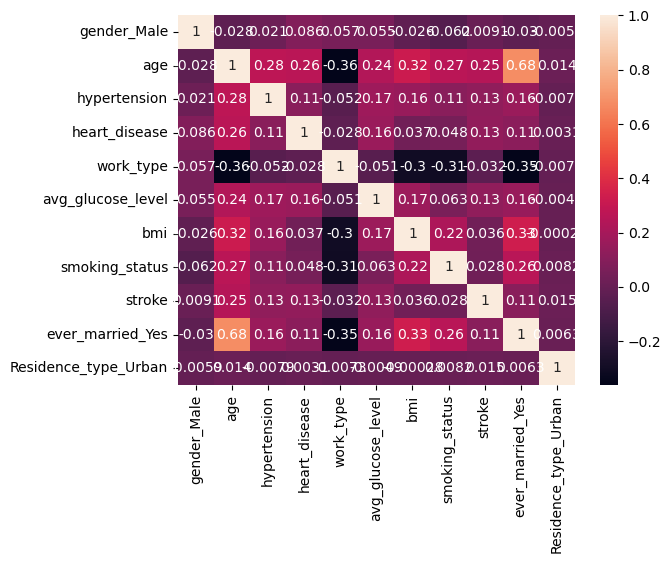

In [47]:
sns.heatmap(d.corr(),annot=True)

In [48]:
x=d.drop(['stroke','age'],axis=1)
x

,gender_Male,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,ever_married_Yes,Residence_type_Urban
0,1.189990,-0.328602,4.185032,-0.153836,2.706375,1.005086,-0.351781,0.723884,0.984080
1,-0.840343,-0.328602,-0.238947,0.763438,2.121559,-0.098981,0.581552,0.723884,-1.016178
2,1.189990,-0.328602,4.185032,-0.153836,-0.005028,0.472536,0.581552,0.723884,-1.016178
3,-0.840343,-0.328602,-0.238947,-0.153836,1.437358,0.719327,1.514885,0.723884,0.984080
4,-0.840343,3.043196,-0.238947,0.763438,1.501184,-0.631531,0.581552,0.723884,-1.016178
...,...,...,...,...,...,...,...,...,...
5105,-0.840343,3.043196,-0.238947,-0.153836,-0.494658,-0.098981,0.581552,0.723884,0.984080
5106,-0.840343,-0.328602,-0.238947,0.763438,0.420775,1.446713,0.581552,0.723884,0.984080
5107,-0.840343,-0.328602,-0.238947,0.763438,-0.511443,0.225745,0.581552,0.723884,-1.016178
5108,1.189990,-0.328602,-0.238947,-0.153836,1.328257,-0.423706,-0.351781,0.723884,-1.016178


In [49]:
y=d['stroke']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.2,random_state=42)

In [51]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [52]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_sm))

Actual Classes Counter({0: 3901, 1: 187})
SMOTE Classes Counter({0: 3901, 1: 3901})


In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() ## base model with default parameters
lr.fit(x_sm, y_sm)

LogisticRegression()

In [54]:
y_hat=lr.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.7025440313111546

In [56]:
r=recall_score(y_test,y_hat)
r

0.6774193548387096

In [57]:
f1=f1_score(y_test,y_hat)
f1

0.21649484536082472

In [58]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pred=dc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
y_train_pred=dc.predict(x_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
acc_train=accuracy_score(y_train,y_train_pred)
acc_train

1.0

In [62]:
pd.crosstab(y_train,y_train_pred)

col_0,0,1
stroke,,
0,3901,0
1,0,187


In [63]:
test_acc=accuracy_score(y_test,y_pred)#testing accuracy 
test_acc

0.9080234833659491

In [64]:
f1=f1_score(y_test,y_pred)
f1

0.12962962962962962